## World happiness reports analysis: part two

The World Happiness Report is a survey of the state of global happiness. The reports review the state of happiness in the world today and show how the new science of happiness explains personal and national variations in happiness.

In this project I will try to get the answer what determines the society of a given country is happy. In this part I analyze the world happiness reports from two years (2018-2019) and I will make analysis by SQL and python libraries: pandas, matplotlib and seaborn.


**Dataset**
- Country: which country is mentioned;
- Region: which region is mentioned;
- Ranking: unique ID for each row;
- Score: happiness, given score value each country/region;
- Economy (GDP per capita): measure of a country's economic output that accounts for its number of people;
- Family (social support): the physical and emotional comfort given to us by our family, friends, co-workers and others;
- Health (healthy life expectancy): average number of years that a person can expect to live in "full health" by taking into account years lived in less than full health due to disease and/or injury;
- Freedom (to make life choices): an individual's opportunity and autonomy to perform an action selected from at least two available options, unconstrained by external parties;
- Trust (perceptions of corruption): an index that scores countries on how corrupt their governments are believed to be;
- Generosity: the quality of being kind and generous.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import sqlite3
from sqlite3 import Error

Connecting with database:

In [40]:
conn = sqlite3.connect("happines.db")

In [41]:
cur = conn.cursor()

Creating read query function:

In [42]:
def read_query(query):
    cur.execute(query)
    rows = cur.fetchall()
    column = [description[0] for description in cur.description]
    return pd.DataFrame(rows,columns=column)                         

### Analysis of 2018 report

In [43]:
query = '''
SELECT * 
FROM Report2018
LIMIT 4;
'''
read_query(query)

,index,Ranking,Country,Score,Economy,Social_support,Health,Freedom,Generosity,Trust
0,0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393
1,1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340
2,2,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408
3,3,4,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138


In [44]:
query = '''
SELECT * 
FROM Report2018;
'''

In [45]:
df_18 = read_query(query)

***Sorting Values***

In [46]:
query = '''
SELECT Country, Score, Ranking
FROM Report2018
ORDER BY Country;
'''
read_query(query)

,Country,Score,Ranking
0,Afghanistan,3.632,145
1,Albania,4.586,112
2,Algeria,5.295,84
3,Angola,3.795,142
4,Argentina,6.388,29
...,...,...,...
151,Venezuela,4.806,102
152,Vietnam,5.103,95
153,Yemen,3.355,152
154,Zambia,4.377,125


How many countries?

In [47]:
query = '''
SELECT COUNT (DISTINCT Country)
FROM Report2018;
'''
read_query(query)

,COUNT (DISTINCT Country)
0,156


Where score is bigger than 5?

In [48]:
query = '''
SELECT COUNT(*)
FROM Report2018
WHERE Score > 5.0;
'''

read_query(query)

,COUNT(*)
0,97


The worst score in 10 countries:

In [49]:
query = '''
SELECT Country, Score
FROM Report2018
GROUP BY Country
ORDER BY AVG(Score)
LIMIT 10;
'''

read_query(query)

,Country,Score
0,Burundi,2.905
1,Central African Republic,3.083
2,South Sudan,3.254
3,Tanzania,3.303
4,Yemen,3.355
5,Rwanda,3.408
6,Syria,3.462
7,Liberia,3.495
8,Haiti,3.582
9,Malawi,3.587


After first observations one can see that there are 156 countries participated in the survey. In 97 countries the score was bigger than 5 and the worst score was in Burundi, Central African Republic and South Sudan.

### Analysis of happiness factors


1. The wealth of the country and happiness

The correlation of economy (GDP per capita) and happiness score:

In [50]:
query = '''
SELECT Country, Score, Economy
FROM Report2018
ORDER BY Economy DESC;
'''

read_query(query)

,Country,Score,Economy
0,United Arab Emirates,6.774,2.096
1,Qatar,6.374,1.649
2,Luxembourg,6.910,1.576
3,Singapore,6.343,1.529
4,Kuwait,6.083,1.474
...,...,...,...
151,Burundi,2.905,0.091
152,Liberia,3.495,0.076
153,Congo (Kinshasa),4.245,0.069
154,Central African Republic,3.083,0.024


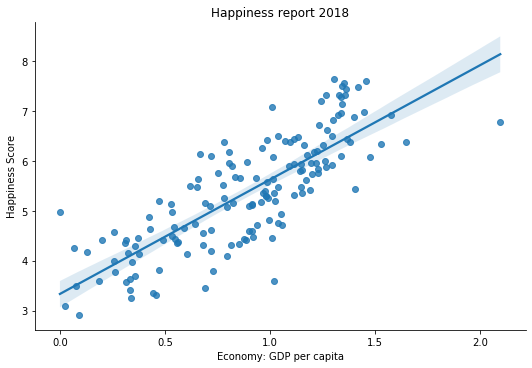

In [54]:
sns.lmplot(data=df_18,
          x = 'Economy',
          y = 'Score',
          aspect=1.5,
          legend=False)
plt.xlabel("Economy: GDP per capita")
plt.ylabel("Happiness Score")
plt.title("Happiness report 2018")
plt.show()

The economy low and score high:

In [33]:
query = '''
SELECT Country, Score, Economy
FROM Report2018
GROUP BY Ranking
HAVING Economy < 0.6 AND Score > 4.5;
'''
read_query(query)

,Country,Score,Economy
0,Tajikistan,5.199,0.474
1,Kyrgyzstan,5.131,0.530
2,Somalia,4.982,0.000
3,Cameroon,4.975,0.535
4,Nepal,4.880,0.425
5,Ivory Coast,4.671,0.541
6,Ghana,4.657,0.592
7,Senegal,4.631,0.429
8,Sierra Leone,4.571,0.256


The correlation between the two factors is big. The happiness score increases with the economy of country but  there are countries where the economy is low but the happines score is a high level of satisfaction.

2. Freedom to make life choices

The correlation of freedom (freedom to make life choices) and happiness score:


In [34]:
query = '''
SELECT Country, Score, Freedom
FROM Report2018
ORDER BY Freedom DESC
LIMIT 10;
'''

read_query(query)

,Country,Score,Freedom
0,Uzbekistan,6.096,0.724
1,Cambodia,4.433,0.696
2,Norway,7.594,0.686
3,Denmark,7.555,0.683
4,Finland,7.632,0.681
5,Iceland,7.495,0.677
6,Somalia,4.982,0.674
7,New Zealand,7.324,0.669
8,Switzerland,7.487,0.660
9,Sweden,7.314,0.659


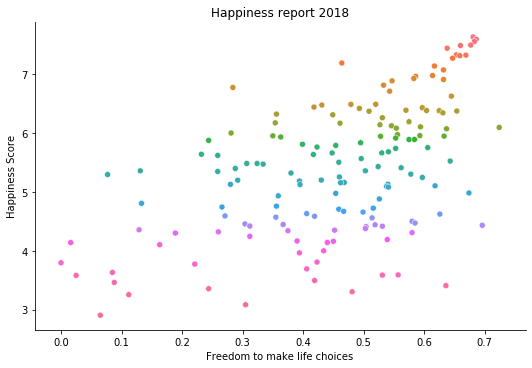

In [55]:
sns.relplot(data=df_18,
           x = "Freedom",
           y = "Score",
           aspect=1.5,
           hue="Country",
           legend=False)

plt.xlabel("Freedom to make life choices")
plt.ylabel("Happiness Score")
plt.title("Happiness report 2018")
plt.show()

The happiness score high and freedom low:

In [36]:
query = '''
SELECT Country, Score, Freedom
FROM Report2018
WHERE Score > 5.5
AND Freedom < 0.4;
'''

read_query(query)

,Country,Score,Freedom
0,United Arab Emirates,6.774,0.284
1,Malaysia,6.322,0.356
2,Slovakia,6.173,0.354
3,Italy,6.000,0.281
4,Lithuania,5.952,0.350
5,Latvia,5.933,0.363
6,South Korea,5.875,0.244
7,Russia,5.810,0.399
8,Moldova,5.640,0.232
9,Hungary,5.620,0.259


The happiness score increases with the freedom and it is the biggest where freedom is high. However we have countries where people feel they have limited freedom, but are relatively content. In countries like Hungary and Moldova people do not feel significant freedom but they do feel happy. The countries with very low index of freedom was change and it was siginficant to previous years.

3. Healthy life expectancy

The healthy life expectancy and happiness score:


In [52]:
query = '''
SELECT Country, Score, Health
FROM Report2018
ORDER BY Health DESC;
'''

read_query(query)

,Country,Score,Health
0,Hong Kong,5.430,1.030
1,Singapore,6.343,1.008
2,Japan,5.915,0.988
3,Spain,6.310,0.965
4,South Korea,5.875,0.955
...,...,...,...
151,Lesotho,3.808,0.079
152,Chad,4.301,0.053
153,Nigeria,5.155,0.048
154,Central African Republic,3.083,0.010


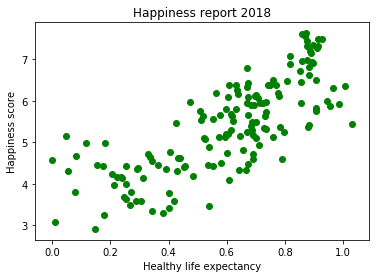

In [53]:
plt.scatter(df_18["Health"],df_18["Score"],color="green")
plt.xlabel("Healthy life expectancy")
plt.ylabel("Happiness score")
plt.title("Happiness report 2018")
plt.show()

The healthy life expectancy has also an influence on happiness and we see that where the higher index of healthy life expectancy the higher happiness score is. The Singapore has bigger index of healthy life expectancy and quite high score of happiness. This factor was the similar to previous years.

4. Healthy life expectancy and Economy (GDP per capita)

In [56]:
query = '''
SELECT Country, Health, Economy
FROM Report2018
ORDER BY Health DESC;
'''

read_query(query)

,Country,Health,Economy
0,Hong Kong,1.030,1.405
1,Singapore,1.008,1.529
2,Japan,0.988,1.294
3,Spain,0.965,1.251
4,South Korea,0.955,1.266
...,...,...,...
151,Lesotho,0.079,0.472
152,Chad,0.053,0.358
153,Nigeria,0.048,0.689
154,Central African Republic,0.010,0.024


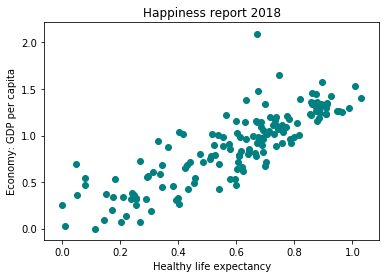

In [57]:
plt.scatter(df_18["Health"],df_18["Economy"],color="teal")
plt.xlabel("Healthy life expectancy")
plt.ylabel("Economy: GDP per capita")
plt.title("Happiness report 2018")
plt.show()

From above plot we can say that the higher economy affects on the higher healthy life expectancy and it is the same as previous years.

5. Perceptions of corruption

The perceptions of corruption (Trust) and happiness score:

In [58]:
query = '''
SELECT Country, Score, Trust
FROM Report2018
ORDER BY Trust DESC;
'''

read_query(query)

,Country,Score,Trust
0,Singapore,6.343,0.457
1,Rwanda,3.408,0.444
2,Denmark,7.555,0.408
3,Finland,7.632,0.393
4,New Zealand,7.324,0.389
...,...,...,...
151,Lithuania,5.952,0.006
152,Romania,5.945,0.001
153,Moldova,5.640,0.000
154,Bosnia and Herzegovina,5.129,0.000


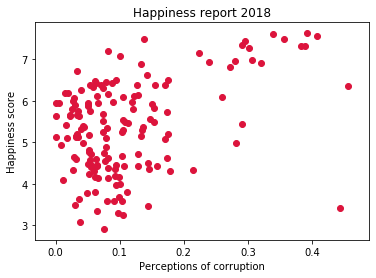

In [59]:
plt.scatter(df_18["Trust"],df_18["Score"],color="crimson")
plt.xlabel("Perceptions of corruption")
plt.ylabel("Happiness score")
plt.title("Happiness report 2018")
plt.show()

The happiness score high and trust high:

In [66]:
query = '''
SELECT Country, Freedom, Trust
FROM Report2018
WHERE Freedom > 0.5
AND Trust > 0.3;
'''

read_query(query)

,Country,Freedom,Trust
0,Finland,0.681,0.393
1,Norway,0.686,0.340
2,Denmark,0.683,0.408
3,Switzerland,0.660,0.357
4,New Zealand,0.669,0.389
5,Sweden,0.659,0.383
6,Australia,0.647,0.302
7,Ireland,0.614,0.306
8,Luxembourg,0.632,0.321
9,Singapore,0.631,0.457


The happiest countries are those where the perception of corruption is low but there are few countries where the index of corruption is high with high score of the happiness. There are countries such as Rwanda, Singapore and Luxembourg.

On which place is Poland?

In [60]:
query = '''
SELECT *
FROM Report2018
WHERE Country = "Poland"
'''

read_query(query)

,index,Ranking,Country,Score,Economy,Social_support,Health,Freedom,Generosity,Trust
0,41,42,Poland,6.123,1.176,1.448,0.781,0.546,0.108,0.064


The Poland is located on 42th place with the quite high score of happiness and again improved its result from previous years.

### Analysis of 2019 report

In [67]:
query = '''
SELECT * 
FROM Report2019
LIMIT 4;
'''

read_query(query)

,index,Ranking,Country,Score,Economy,Social_support,Health,Freedom,Generosity,Trust
0,0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118


In [75]:
query = '''
SELECT * 
FROM Report2019;
'''

In [76]:
df_19 = read_query(query)

How many countries?

In [69]:
query = '''
SELECT COUNT (DISTINCT Country)
FROM Report2019;
'''

read_query(query)

,COUNT (DISTINCT Country)
0,156


Checking the missing values:

In [71]:
query = '''
SELECT *
FROM Report2019
WHERE Score is null;
'''

read_query(query)

,index,Ranking,Country,Score,Economy,Social_support,Health,Freedom,Generosity,Trust


The worst score in 10 countries:

In [72]:
query = '''
SELECT Country, Score
FROM Report2019
GROUP BY Country
ORDER BY AVG(Score)
LIMIT 10;
'''

read_query(query)

,Country,Score
0,South Sudan,2.853
1,Central African Republic,3.083
2,Afghanistan,3.203
3,Tanzania,3.231
4,Rwanda,3.334
5,Yemen,3.380
6,Malawi,3.410
7,Syria,3.462
8,Botswana,3.488
9,Haiti,3.597


After first observations one can see that there are no missing values. In the survey was participated 156 countries. The worse score was in South Sudan, Central African Republic and Afghanistan. 

### Analysis of happiness factors

1. The wealth of the country and happiness

The correlation of economy (GDP per capita) and happiness score:

In [78]:
query = '''
SELECT Country, Score, Economy
FROM Report2019
ORDER BY Economy DESC
LIMIT 10;
'''

read_query(query)

,Country,Score,Economy
0,Qatar,6.374,1.684
1,Luxembourg,7.090,1.609
2,Singapore,6.262,1.572
3,United Arab Emirates,6.825,1.503
4,Kuwait,6.021,1.500
5,Ireland,7.021,1.499
6,Norway,7.554,1.488
7,Switzerland,7.480,1.452
8,Hong Kong,5.430,1.438
9,United States,6.892,1.433


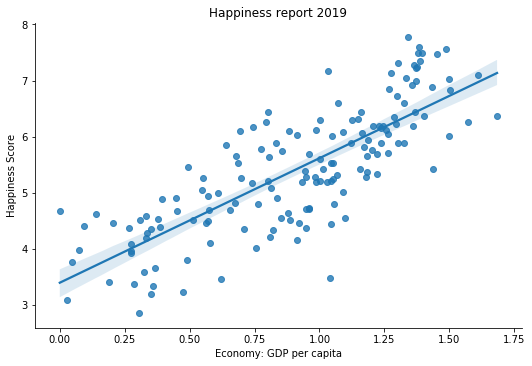

In [77]:
sns.lmplot(data=df_19,
          x = 'Economy',
          y = 'Score',
          aspect=1.5,
          legend=False)
plt.xlabel("Economy: GDP per capita")
plt.ylabel("Happiness Score")
plt.title("Happiness report 2019")
plt.show()

The economy low and score high:

In [79]:
query = '''
SELECT Country, Score, Economy
FROM Report2019
GROUP BY Ranking
HAVING Economy < 0.5 AND Score > 4.5;
'''
read_query(query)

,Country,Score,Economy
0,Tajikistan,5.467,0.493
1,Nepal,4.913,0.446
2,Benin,4.883,0.393
3,Senegal,4.681,0.450
4,Somalia,4.668,0.000
5,Niger,4.628,0.138
6,Burkina Faso,4.587,0.331
7,Guinea,4.534,0.380
8,Gambia,4.516,0.308


The similar to previous years the correlation between the two factors is big. The happiness score increases with the economy of country but there are also countries where the economy is low and the happines score is a high level.

2. Freedom to make life choices

The correlation of freedom (freedom to make life choices) and happiness score:

In [81]:
query = '''
SELECT Country, Score, Freedom
FROM Report2019
ORDER BY Freedom DESC
LIMIT 10;
'''

read_query(query)

,Country,Score,Freedom
0,Uzbekistan,6.174,0.631
1,Cambodia,4.700,0.609
2,Norway,7.554,0.603
3,United Arab Emirates,6.825,0.598
4,Finland,7.769,0.596
5,Denmark,7.600,0.592
6,Iceland,7.494,0.591
7,New Zealand,7.307,0.585
8,Canada,7.278,0.584
9,Sweden,7.343,0.574


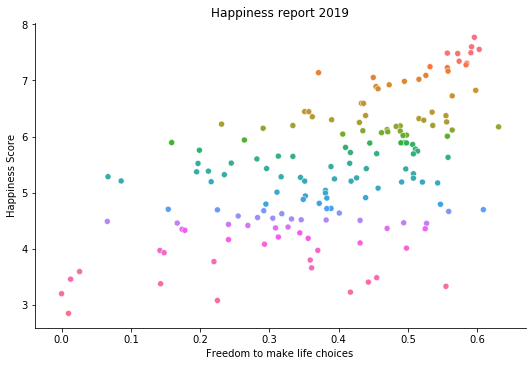

In [83]:
sns.relplot(data=df_19,
           x = "Freedom",
           y = "Score",
           aspect=1.5,
           hue="Country",
           legend=False)

plt.xlabel("Freedom to make life choices")
plt.ylabel("Happiness Score")
plt.title("Happiness report 2019")
plt.show()

The freedom below than 0.4 and happiness score above 6.0:

In [84]:
query = '''
SELECT Country, Score, Freedom
FROM Report2019
WHERE Score > 6.0
AND Freedom < 0.4;
'''

read_query(query)

,Country,Score,Freedom
0,Israel,7.139,0.371
1,Taiwan,6.446,0.351
2,Chile,6.444,0.357
3,Spain,6.354,0.362
4,Brazil,6.300,0.390
5,Italy,6.223,0.231
6,Slovakia,6.198,0.334
7,Lithuania,6.149,0.291


In [85]:
freedom19 = read_query(query)

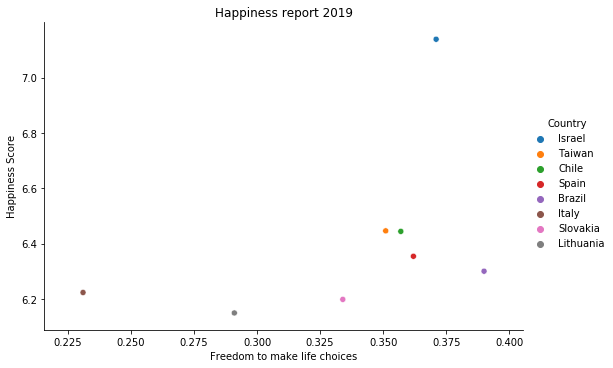

In [86]:
sns.relplot(data=freedom19,
           x = "Freedom",
           y = "Score",
           aspect=1.5,
           hue="Country")

plt.xlabel("Freedom to make life choices")
plt.ylabel("Happiness Score")
plt.title("Happiness report 2019")
plt.show()

The same as previous years the happiness score increases with the freedom but there are countries where the freedom is lower but people are relatively content. The changed a little countries where people do not feel significant freedom, but they do feel happy and they are Italy,  Slovakia and Lithuania.

3. Healthy life expectancy and Economy (GDP per capita): 

In [88]:
query = '''
SELECT Country, Health, Economy
FROM Report2019
ORDER BY Health DESC
LIMIT 10;
'''

read_query(query)

,Country,Health,Economy
0,Singapore,1.141,1.572
1,Hong Kong,1.122,1.438
2,Japan,1.088,1.327
3,Spain,1.062,1.286
4,Switzerland,1.052,1.452
5,France,1.045,1.324
6,Cyprus,1.042,1.263
7,Northern Cyprus,1.042,1.263
8,Canada,1.039,1.365
9,Italy,1.039,1.294


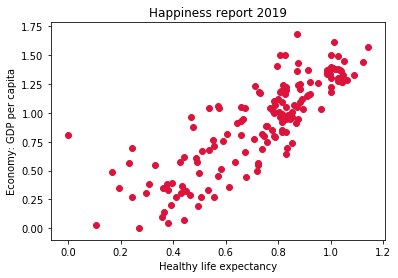

In [89]:
plt.scatter(df_19["Health"],df_19["Economy"],color="crimson")
plt.xlabel("Healthy life expectancy")
plt.ylabel("Economy: GDP per capita")
plt.title("Happiness report 2019")
plt.show()

In the same as previous years the higher economy the higher healthy life expectancy.


4. Social support and Economy (GDP per capita):

In [91]:
query = '''
SELECT Country, Social_support, Economy
FROM Report2019
ORDER BY Social_support DESC
LIMIT 10;
'''

read_query(query)

,Country,Social_support,Economy
0,Iceland,1.624,1.380
1,Finland,1.587,1.340
2,Norway,1.582,1.488
3,Denmark,1.573,1.383
4,New Zealand,1.557,1.303
5,Ireland,1.553,1.499
6,Australia,1.548,1.372
7,United Kingdom,1.538,1.333
8,Turkmenistan,1.538,1.052
9,Mongolia,1.531,0.948


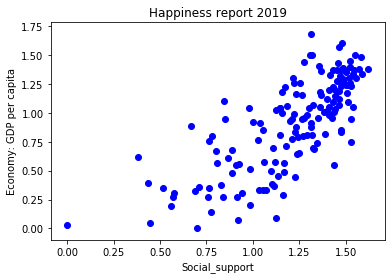

In [92]:
plt.scatter(df_19["Social_support"],df_19["Economy"],color="blue")
plt.xlabel("Social_support")
plt.ylabel("Economy: GDP per capita")
plt.title("Happiness report 2019")
plt.show()

In the same as previous years the higher economy the higher social support.

On which place is Poland?

In [87]:
query = '''
SELECT *
FROM Report2019
WHERE Country = "Poland"
'''

read_query(query)

,index,Ranking,Country,Score,Economy,Social_support,Health,Freedom,Generosity,Trust
0,39,40,Poland,6.182,1.206,1.438,0.884,0.483,0.117,0.05


The Poland is located on 40th place with the quite high score of happiness and improved their result from a years ago.

### Summary

In the second part of the project I have analyzed world happiness report data over two years (2018-2019). For this purpose I have used SQL queries and python libraries for visualizations. The same as previous years it can be concluded that the countries happiness determines several factors. One can see a significant impact the country's wealth on the happiness of its inhabitants, but there are less wealthy countries with a relativity level of happiness. Freedom to make life choices, social support and healthy life expectancy have also an influence on happiness and increased its score. The generosity and perceptions of corruption have not significant impact on the happiness score. There are also countries where the all factors are low but the happines score is a relatively content.
